# NASDAQ Data Exploration 

In [ ]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [ ]:
import warnings
import itertools
import numpy as np
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['xtick.labelsize'] = 16
matplotlib.rcParams['ytick.labelsize'] = 16
matplotlib.rcParams['text.color'] = 'k'

Load NASDAQ file into DataFrame

In [ ]:
nasdaq = "NASDAQ.csv"
df_nasdaq = pd.read_csv(nasdaq)


In [ ]:
#drop uneccesary columns

df_nasdaq.drop('High', axis = 1, inplace = True)
df_nasdaq.drop('Low', axis = 1, inplace = True)
df_nasdaq.drop('Volume', axis = 1, inplace = True)

In [ ]:
#check  dataframe
print(df_nasdaq)

Drop empty Columns

In [ ]:
null_open = any(df_nasdaq['Open'].isnull())
if null_open:
    print("Removing null entries from Open Stocks")
    df_nasdaq = df_nasdaq.dropna()  
    
assert not null_open

In [ ]:
null_close= any(df_nasdaq['Close'].isnull())
if null_close:
    print("Removing null entries from Close Stocks")
    df_nasdaq = df_nasdaq.dropna()  
    
assert not null_close

In [ ]:
null_adjclose= any(df_nasdaq['Adj Close'].isnull())
if null_adjclose:
    print("Removing null entries from Adj Close Stocks")
    df_nasdaq = df_nasdaq.dropna()  
    
assert not null_adjclose

In [ ]:
df_nasdaq.describe()

In [ ]:
#df_nasdaq.set_index('Date')
#df_nasdaq = df_nasdaq.reset_index()
#df_nasdaq = df_nasdaq.drop(['index'], axis = 1)

#df_nasdaq['Date'] = pd.to_datetime(df_nasdaq['Date'])
df_nasdaq.set_index('Date', inplace = True)
print(df_nasdaq.index)


In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(df_nasdaq.index, df_nasdaq['Open'])
#df_nasdaq['Open'].plot(figsize=(15, 6))
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

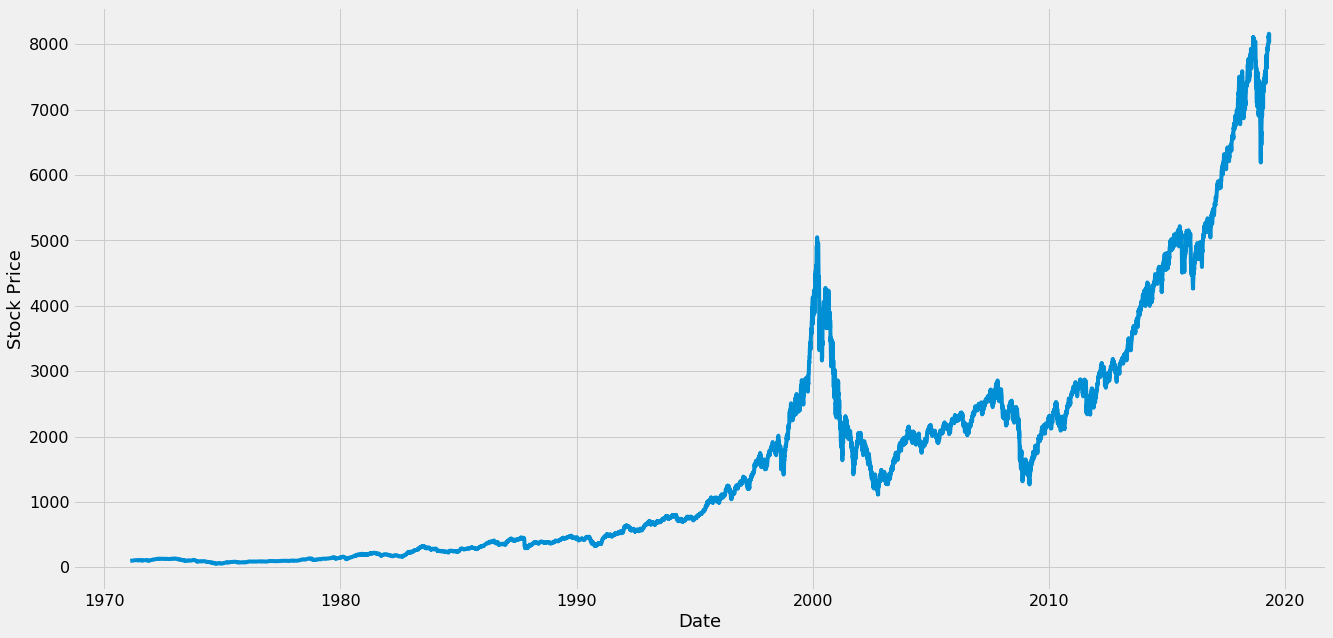

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(df_nasdaq.index, df_nasdaq['Close'])

#df_nasdaq['Open'].plot(figsize=(15, 6))
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

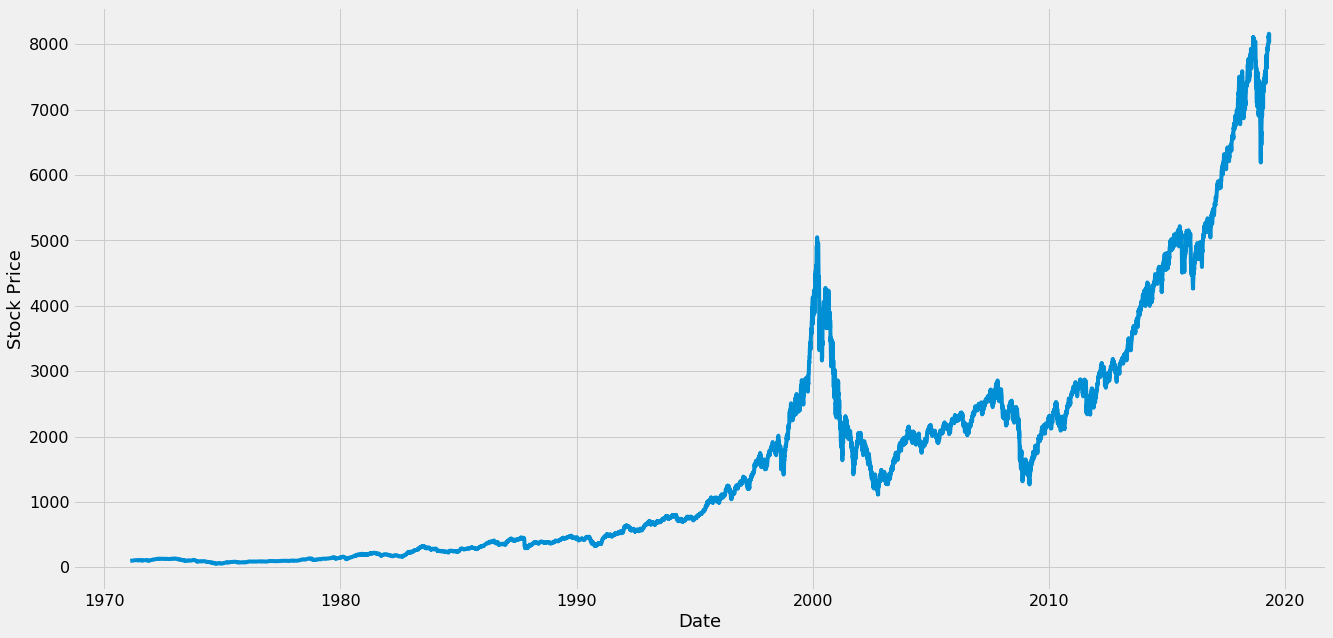

In [13]:
plt.figure(figsize=(20, 10))
plt.plot(df_nasdaq['D, df_nasdaq['Adj Close'])

#df_nasdaq['Open'].plot(figsize=(15, 6))
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

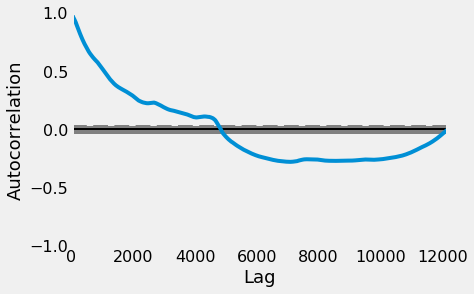

In [14]:
autocorrelation_plot(df_nasdaq['Open'])


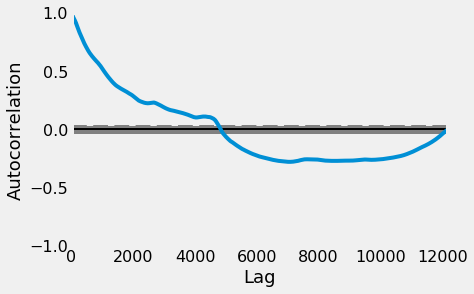

In [15]:
autocorrelation_plot(df_nasdaq['Close'])

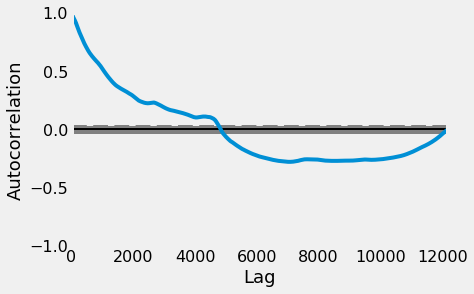

In [16]:
autocorrelation_plot(df_nasdaq['Adj Close'])

In [17]:
#code idea from https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df_nasdaq['Open'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.234056
p-value: 0.998909


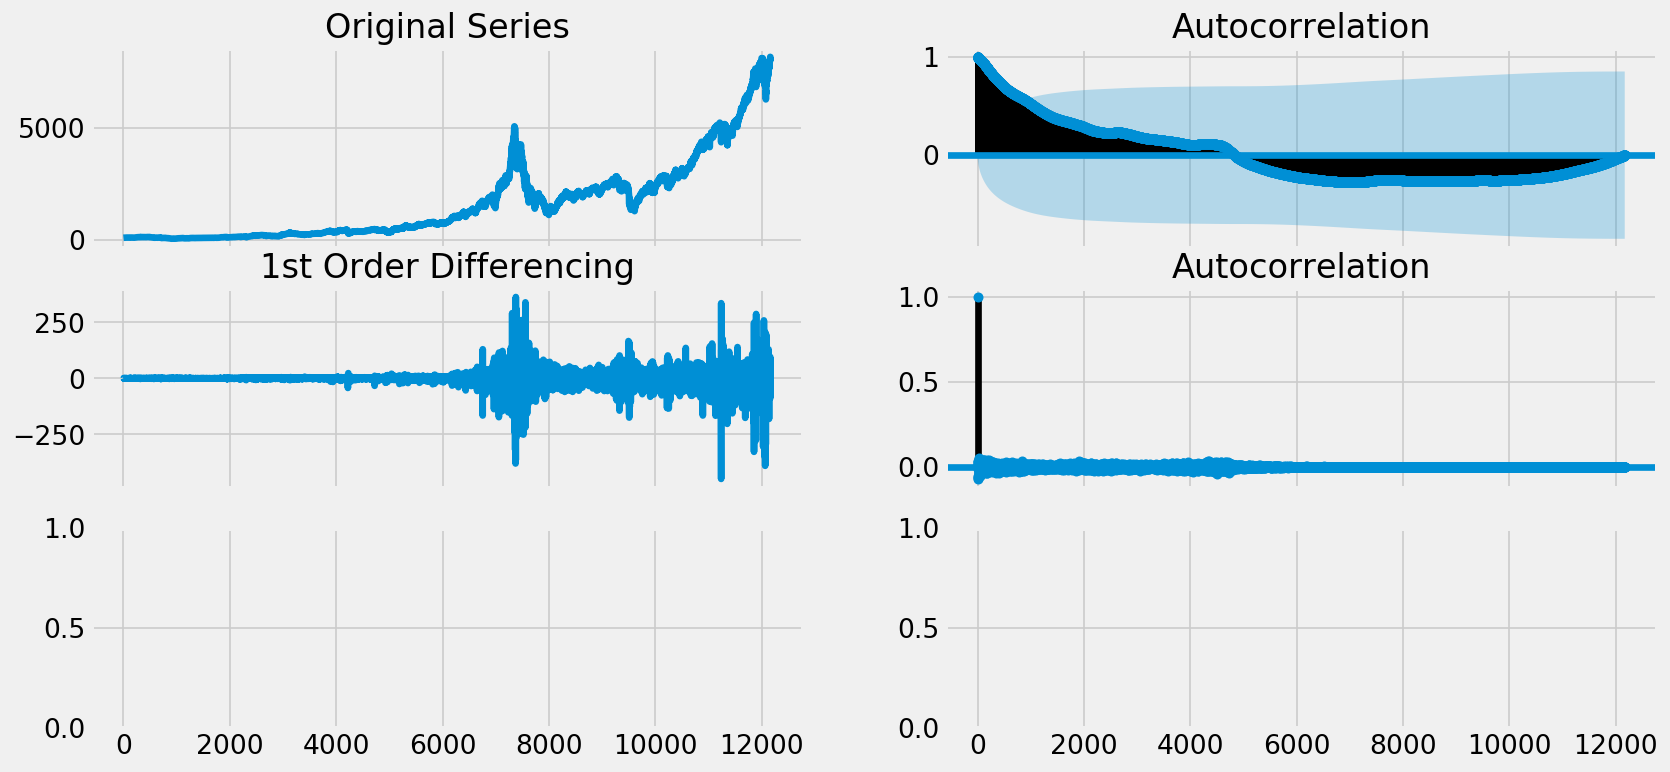

In [18]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(15,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df_nasdaq['Open']); axes[0, 0].set_title('Original Series')
plot_acf(df_nasdaq['Open'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df_nasdaq['Open'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df_nasdaq['Open'].diff().dropna(), ax=axes[1, 1])

plt.show()